# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )


## Importing necessary libraries

In [1205]:
# Libraries needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import sklearn
import tensorflow as tf

%matplotlib inline

from imblearn.over_sampling import SMOTE
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

* Libraries successfully loaded.

In [1206]:
# Preventing scientific notation.}
pd.set_option("display.float_format", lambda x: "%.3f" % x)

* Code ran to block scientific notation.

## Loading the dataset

In [1207]:
# Importing and mounting google drive to access the data in colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1208]:
# Saving the path of the .csv file.
path = '/content/drive/MyDrive/Project 4/Churn.csv'
# Creating the data frame, data, to load the .csv to the notebook
data = pd.read_csv(path)
# Creating copy of the data frame, df, to keep the original data unaltered.
df = data.copy()

* Data loaded and data frame created.

## Data Overview

In [1209]:
# Shape of the data frame.
df.shape

(10000, 14)

* Observed shape of data frame.

In [1210]:
# First 5 rows of the data frame.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


* Observed first 5 rows of data frame.

In [1211]:
# Last 5 rows of the data frame.
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


* Observed last 5 rows of data frame.

In [1212]:
# Information about the data frame's columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Observed data types of the columns.
* Observed no null values present in the data set.

In [1213]:
# Checking the data frame for duplicate values.
df.duplicated().value_counts()

False    10000
dtype: int64

* Observed no duplicate values in the data set.

In [1214]:
# Checking the data frame for na values.
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Observed no null values present in the data set.

In [1215]:
# Statistical summary of the columns with data type of "Int64" and "Float64".
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


* Observed statistical summary of numerical data.

In [1216]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


* Observed statistical summary of columns with data type object.

In [1217]:
# Checking the percentages of classes in the target variable column.
df['Exited'].value_counts(1)

0   0.796
1   0.204
Name: Exited, dtype: float64

* Observed class percentages in target vaiable column.

In [1218]:
# Dropping "RowNumber", "CustomerId", & "Surname" columns beacuse they are unnecessary information for analysis.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

* Dropped unnecessary columns.

In [1219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* Observed columns were successfully dropped.

In [1220]:
# Top 5 rows of the new data frame.
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


* Observed first 5 rows of new data frame.

In [1221]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Geography',
    'Gender'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

* Converting columns with object data type to categorical data type.

In [1222]:
# Observing the data types of the new data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


* Observed the data types were successfully changed to categorical.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

**Answers**:

1.   * Customer's `CreditScore` has a median value of about 650, with a mean very slightly lower than that.
     * The data is normally distributed with a slight left skew due to outliers.
     * There is a larger than expected amount of customers with the maximum credit score.

2.  * There are 5151 customers that the bank considers active users.

3.  * Most customer attributes do not have significant correlation.
    * There is some slight positive correlation between `Age` and `Exited`.
    * There is some slight negative correlation between `Balance` and `NumOfProducts`.

4. * Females are churning more often than males, although both are relatively similar.

5. * Customers located in Germany churn about twice as often as customers located in other France or Spain.





### Functions to use for EDA

In [1223]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1224]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1225]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1226]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

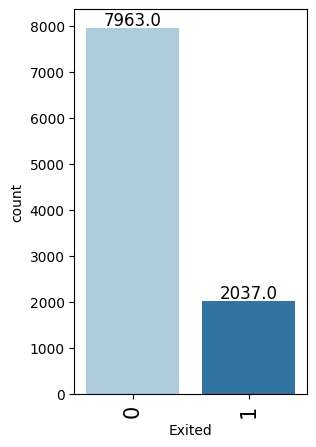

In [1227]:
# Target variable
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Exited")

* `Exited` is the target variable
* Observed majority class of target variable is 0 - customers who have not exited the bank.

In [1228]:
df['Exited'].value_counts(1)*100

0   79.630
1   20.370
Name: Exited, dtype: float64

* 79% of customers are existing customers.
* 20% of custsomers have exited.

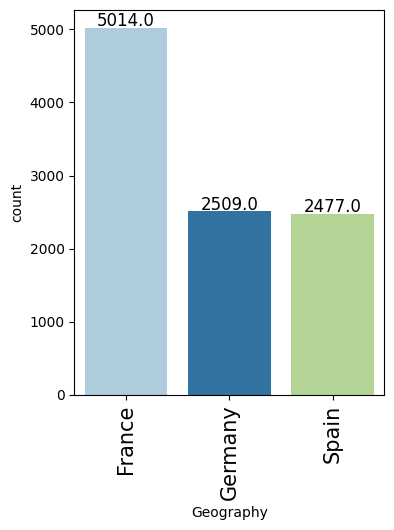

In [1229]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Geography")

* Observed about half the customers are located in France.
* Observed about a quarter of customers are located in Germany.
* Observed about a quarter of customers are located in Spain.

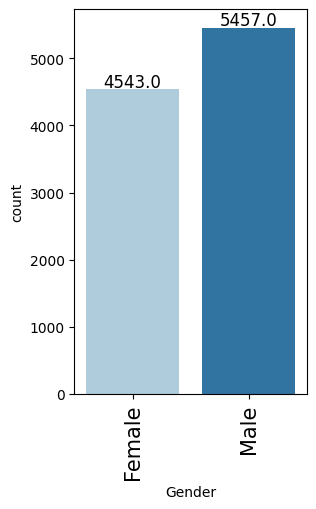

In [1230]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'Gender')

In [1231]:
df['Gender'].value_counts(1)

Male     0.546
Female   0.454
Name: Gender, dtype: float64

* Observed that most customers are male.
* Although males are the majority, 45% are females.

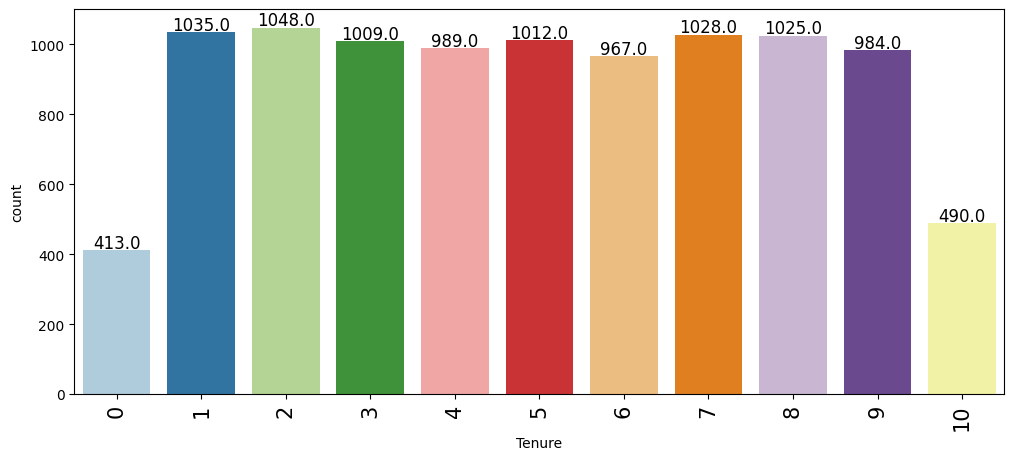

In [1232]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Tenure")

* Observed `tenure` ranges from 0 to 10 years.
* There are many less customers with a `tenure` of 0 or 10 years compared to other lengths of `tenure`.
* `Tenure` lengths of 1 to 9 make up the majority of `tenure` lengths.
* There are nearly equal amounts of customers with `tenure` from 1 to 9 years.

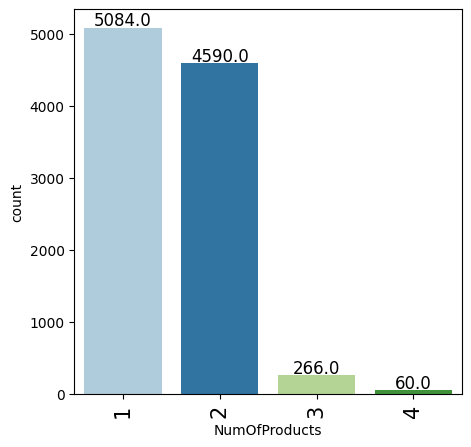

In [1233]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "NumOfProducts")

In [1234]:
df['NumOfProducts'][df['NumOfProducts']>2].value_counts().sum()

326

* Observed the majority of customers have purchased 1 or 2 products with the bank.
* Observed only 326 customers have purchased more than 2 products with the bank.

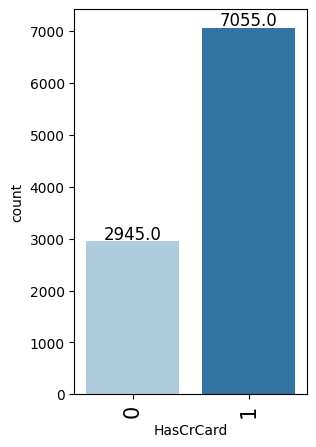

In [1235]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'HasCrCard')

In [1236]:
df['HasCrCard'].value_counts(1)

1   0.706
0   0.294
Name: HasCrCard, dtype: float64

* 70.6% of customers have a credit card.
* 29.4% of customers do not have a credit card.

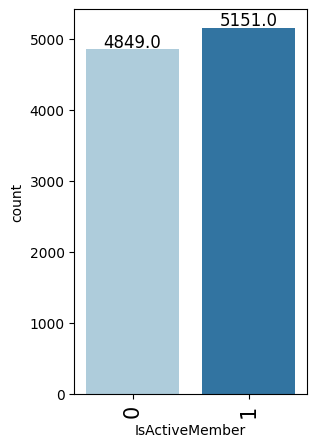

In [1237]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'IsActiveMember')

* Most customers are active members, but its nearly equally distributed.

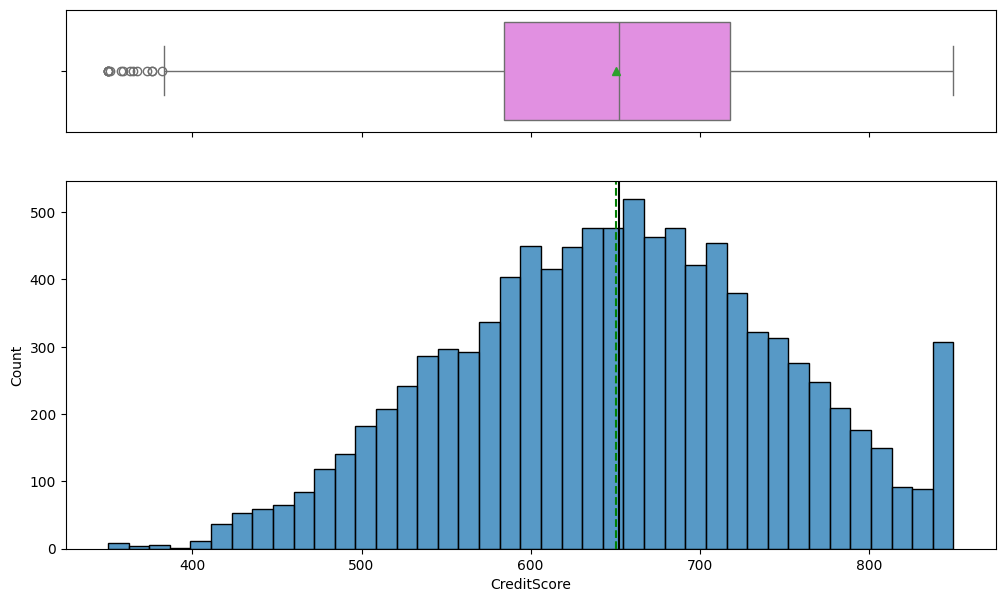

In [1238]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "CreditScore")

* Customer's `CreditScore` has a median value of about 650, with a mean very slightly lower than that.
* The data is normally distributed with a slight left skew due to outliers.

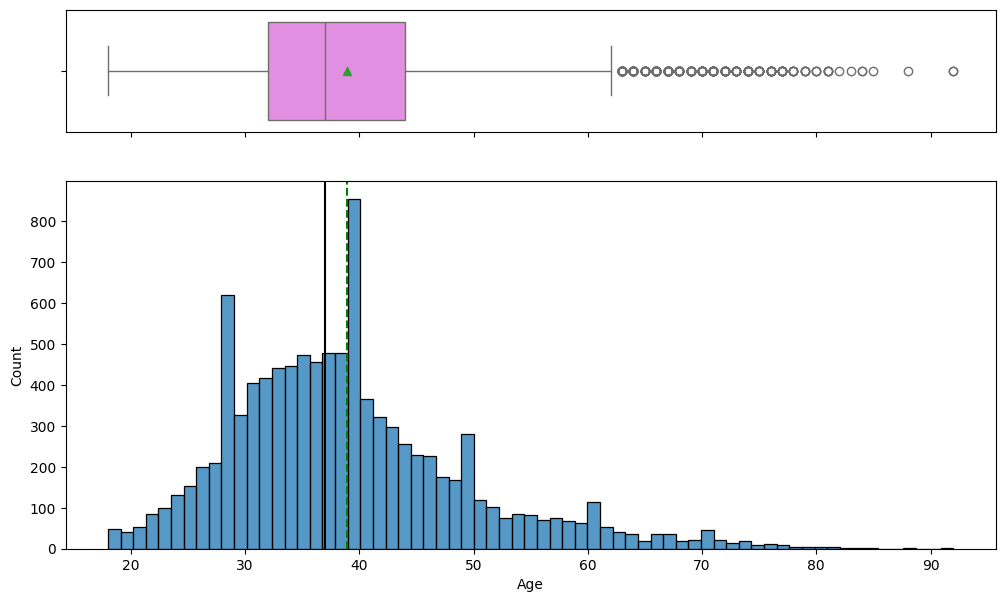

In [1239]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Age")

In [1240]:
df['Age'].median()

37.0

In [1241]:
df['Age'].mean()

38.9218

* Observed customers have a median `age` of 37 and a mean of 38.9 years old.
* Customers over `age` 62 are appearing as outliers and are right skewing the distribution.

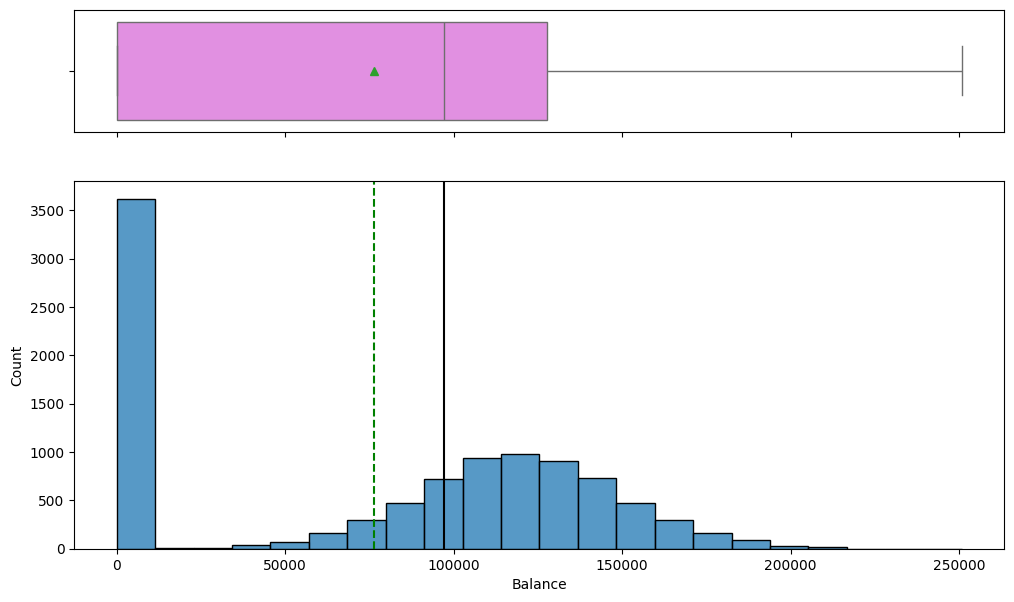

In [1242]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Balance")

In [1243]:
df["Balance"].value_counts(1).head(5)*100

0.000        36.170
130170.820    0.020
105473.740    0.020
85304.270     0.010
159397.750    0.010
Name: Balance, dtype: float64

* Observed that 36% of customers have a `balance` of 0.
* These customers are left skewing the distribution.
* The median `balance` is almost 100k.

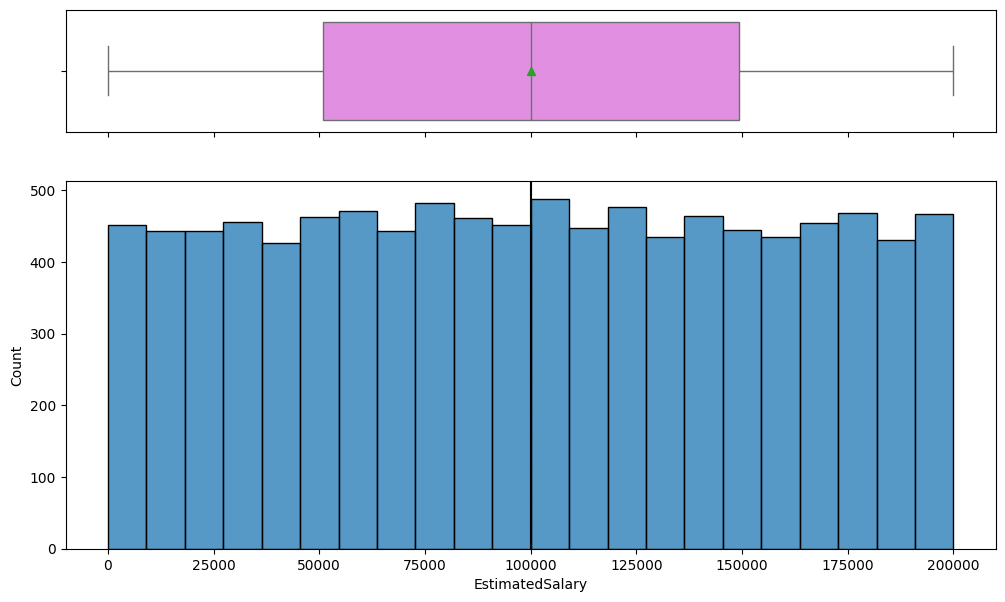

In [1244]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, 'EstimatedSalary')

* Customers' `EstimatedSalary` is evenly distibuted from 0 to 200k.
* No outliers present.

### Multivariate Analysis

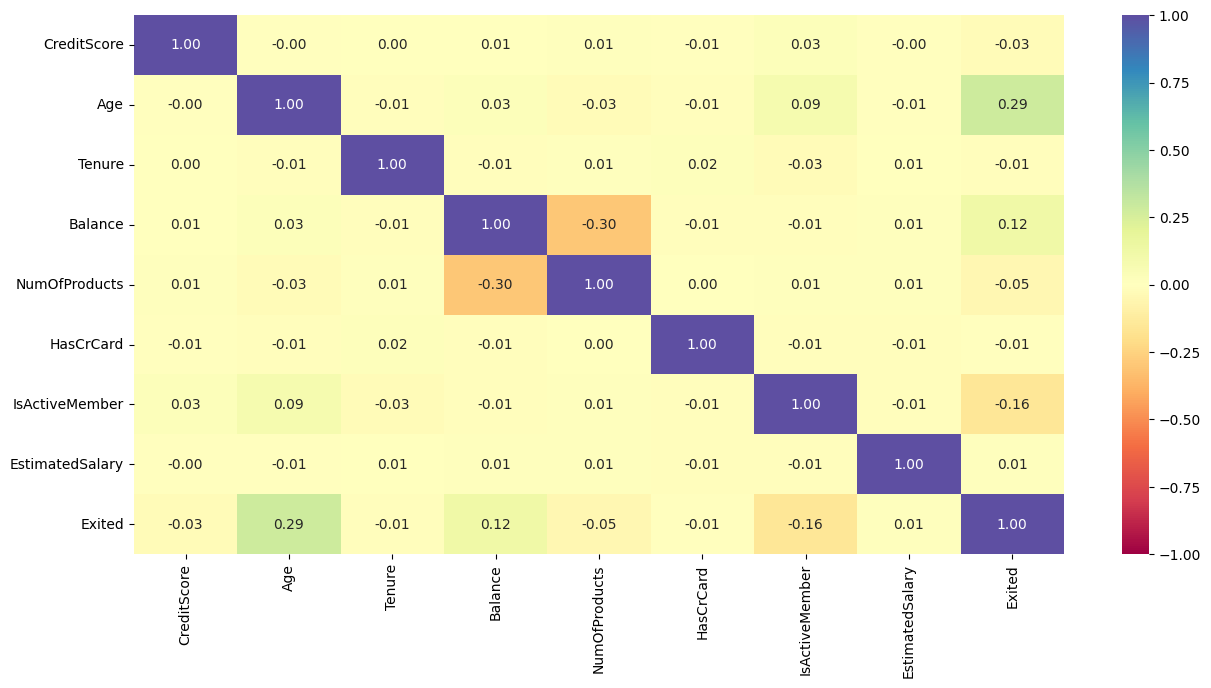

In [1245]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No significant correlation exists between variables.
* There is some slight positive correlation between `Age` and `Exited`.
* There is some slight negative correlation between `Balance` and `NumOfProducts`.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


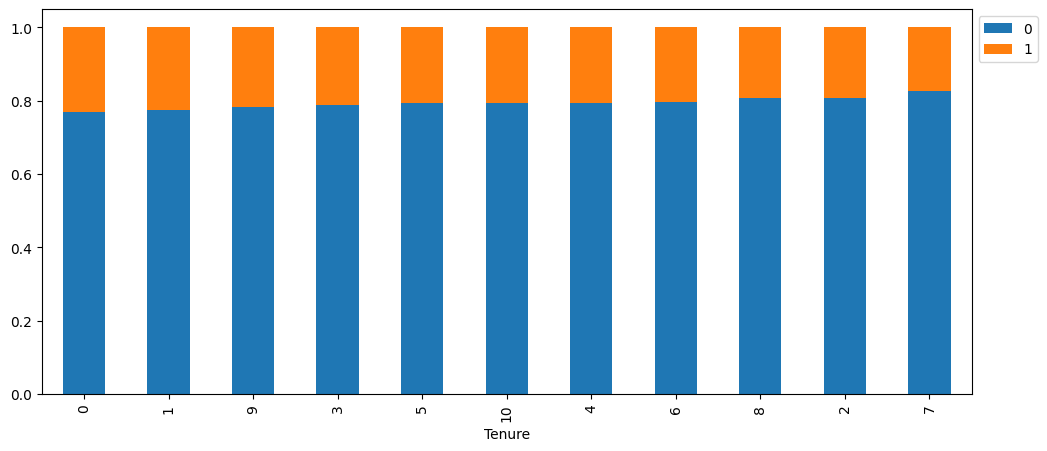

In [1246]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Tenure', 'Exited')

* Observed class ratios are very similar between different `tenure` lengths.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


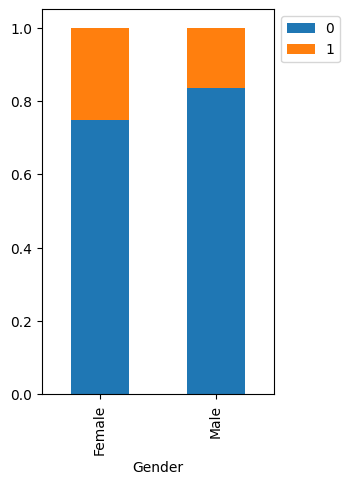

In [1247]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Gender', 'Exited')

* Observed slightly more females have exited than men.
* Although more females have exited, the number of men who have exited is similar.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


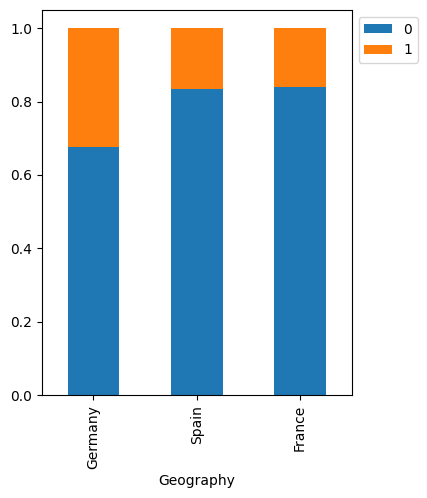

In [1248]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Geography', 'Exited')

* Observed a larger ratio of customers located in Germany have exited than customers located in other countries.
* Customers who are located in Spain and France have a similar exit ratio.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


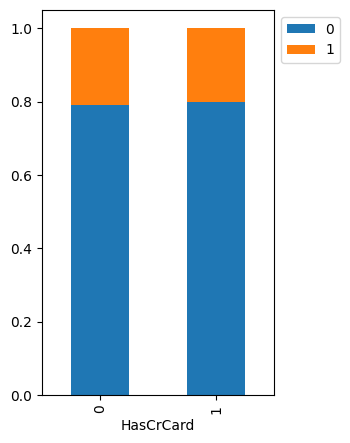

In [1249]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'HasCrCard', 'Exited')

* Observed class ratios are very similar between customers who have credit cards and those who do not have credit cards.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


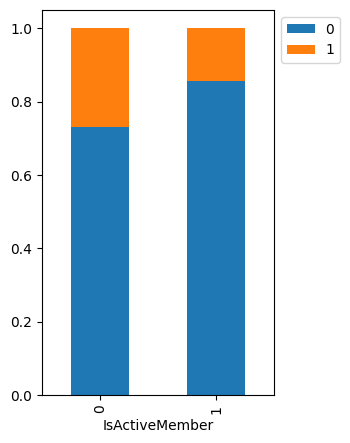

In [1250]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Observed that customers who are not considered to be active members exit at a higher rate than customers who are considered active members.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


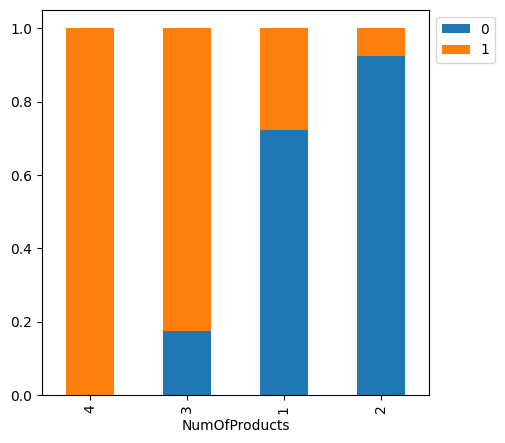

In [1251]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'NumOfProducts', 'Exited')

* All customers who purchased 4 products from the bank have exited.
* The majority of customers who purchased 3 products from the bank have exited.
* Customers who have purchased 1 or 2 products from the bank are exiting at much lower rates.
* Customers who have purchased 2 products from the bank are least likely to leave.

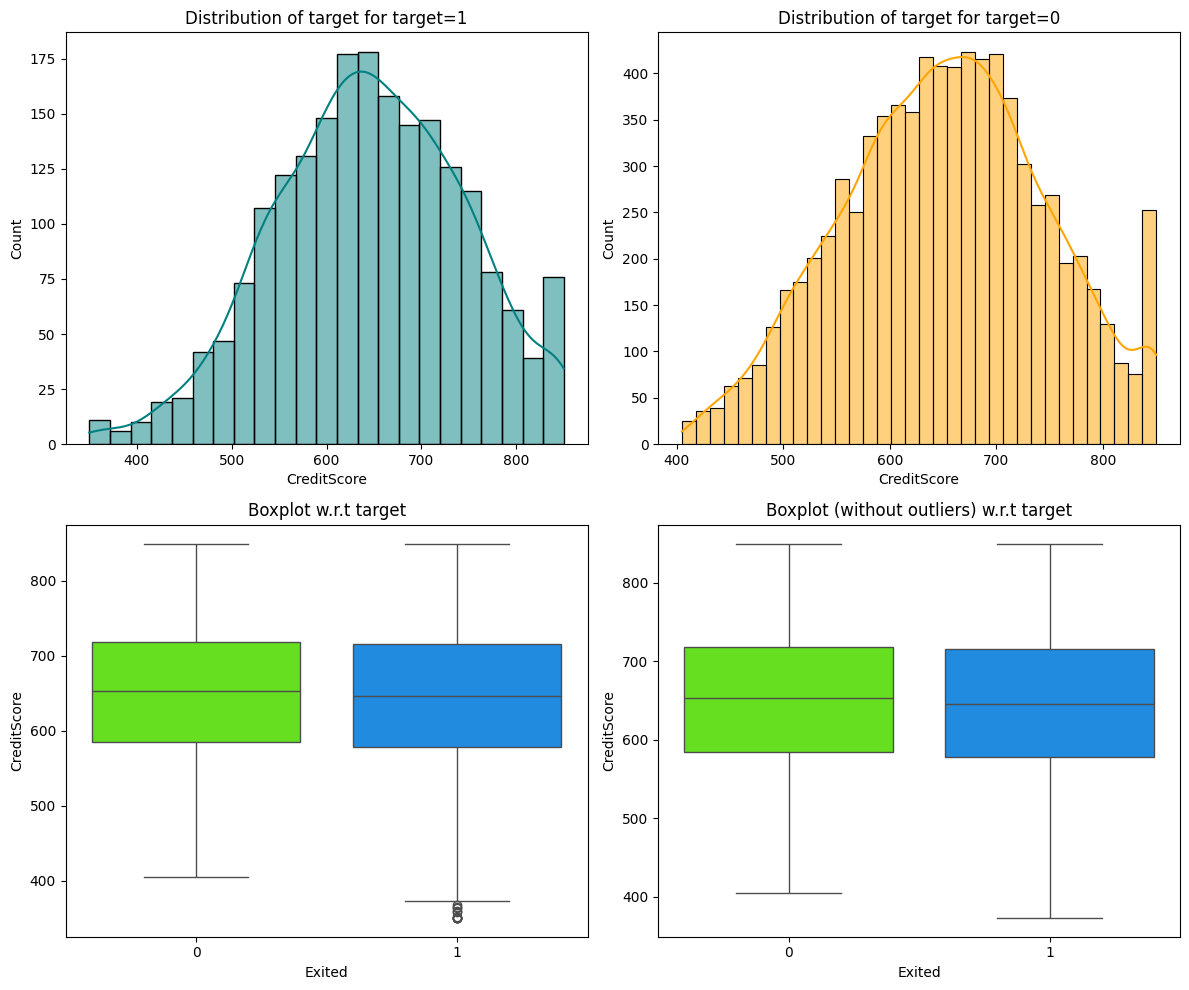

In [1252]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* The distributions of `CreditScore` for customers who have exited and customers who have not exited are very similar.
* The box plots of `CreditScore` for customers who have exited and customers who have not exited are nearly identical.
* The minimum `CreditScore` of customers who have exited is lower than the min `CreditScore` of customers who have not exited.

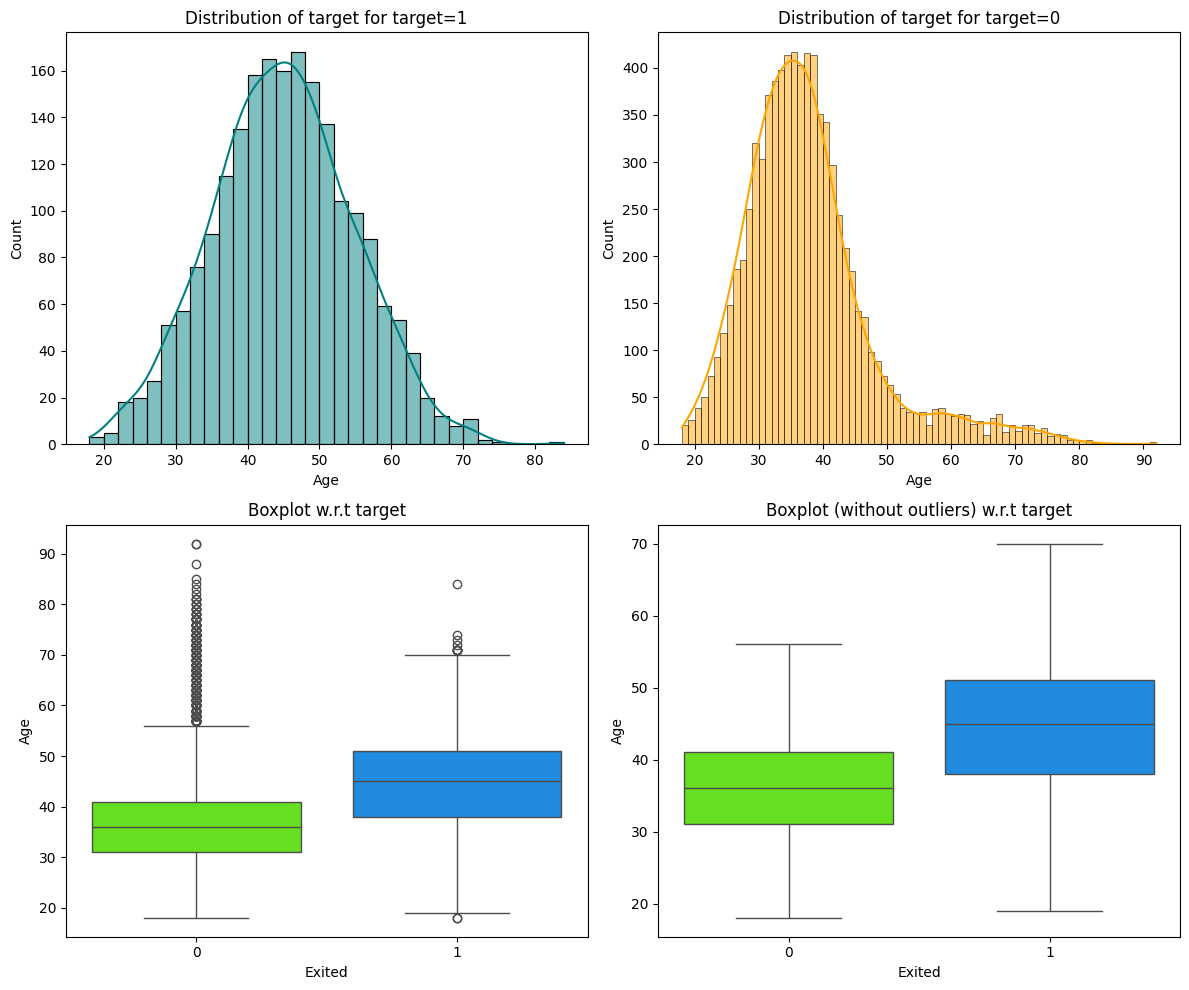

In [1253]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Age", "Exited")

* Observed the median `age` of customers who have exited is about 45, whereas the median `age` of customers who have not exited is about 35.
* Observed the max `age` of customers who have exited is much greated than the max `age` of customers who have not exited if outliers are ignored.

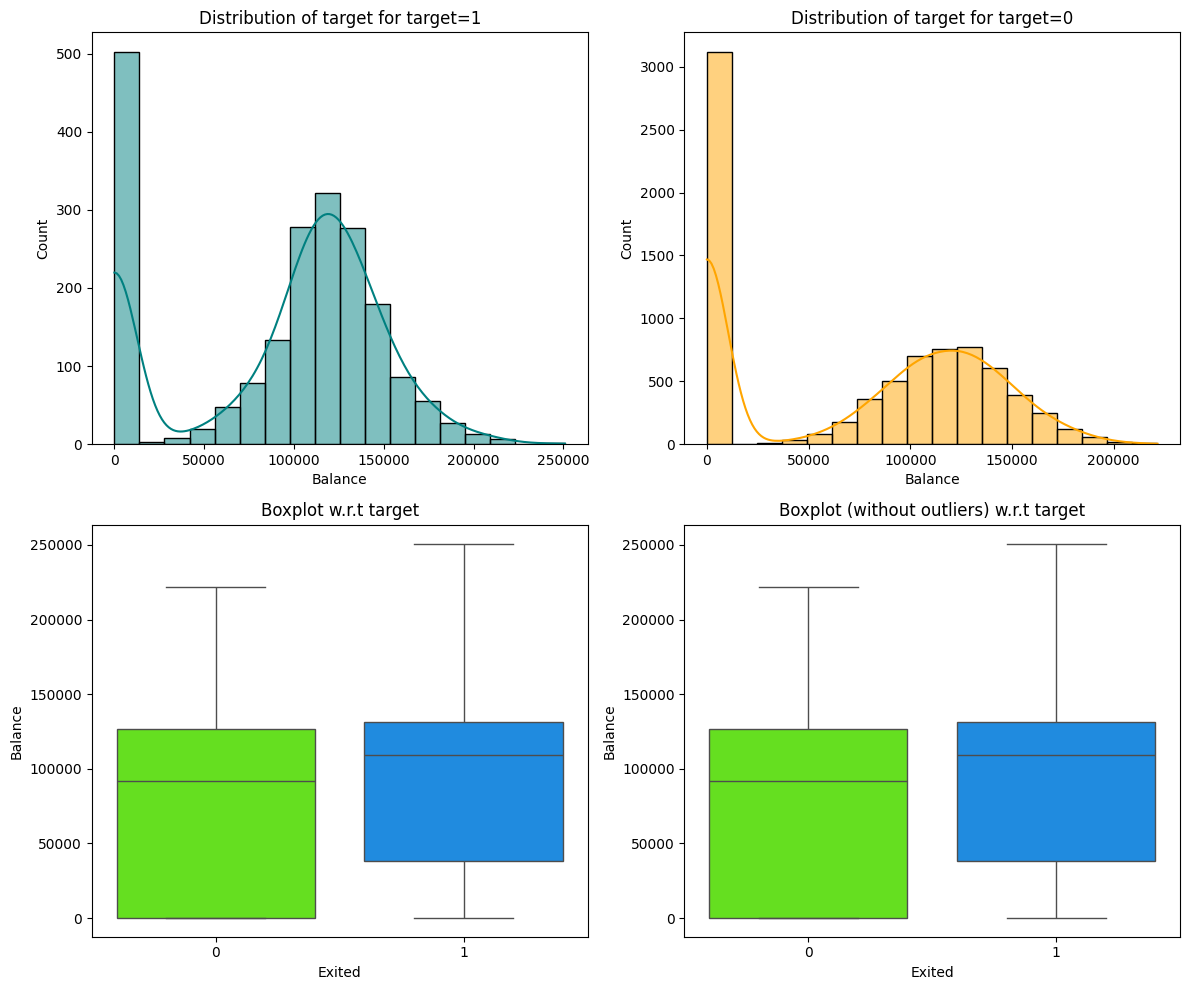

In [1254]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Balance", "Exited")

* Observed that the distribution of account `balance` for customers who have exited and customers who have not exited is very similar.
* Observed that the peak of the distribution of account `balance` for customers who have exited is much higher than that of the same distribution for customers who have not exited.
* Observered the max account `balance` of customers who have exited is higher than the account `balance` of customers whoe have not exited.

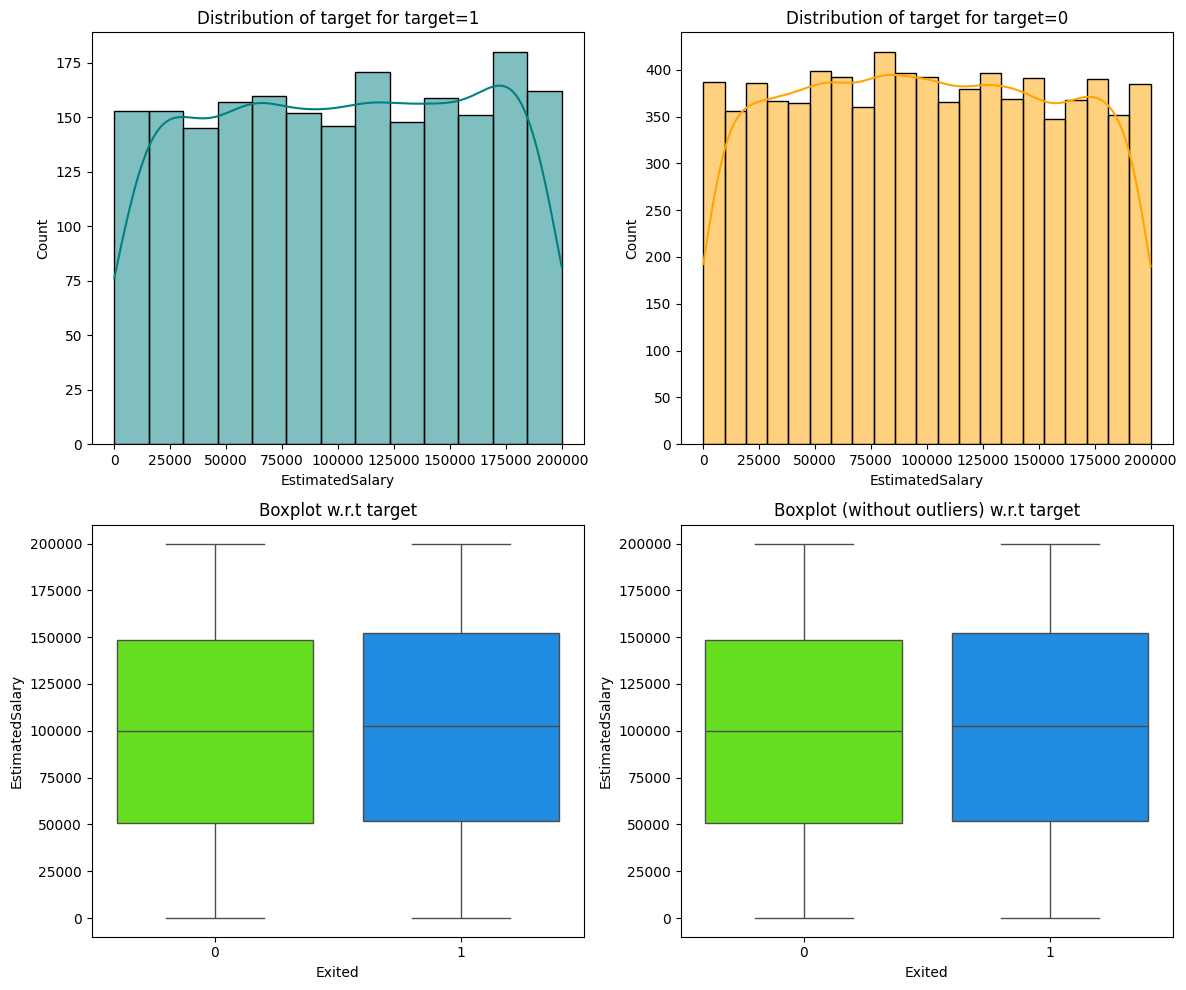

In [1255]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* Observed that the distribution of `EstimatedSalary` for customers who have exited and customers who have not exited is nearly identical.
* Observed that the box plots of `EstimatedSalary` for customers who have exited and customers who have not exited is nearly identical.

## Data Preprocessing

### Outlier Detection

In [1256]:
# Code to be used checking for outliers.
Q1 = df.quantile(0.25)  # The 25th percentile.
Q3 = df.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [1257]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

CreditScore        0.150
Age                3.590
Tenure             0.000
Balance            0.000
NumOfProducts      0.600
HasCrCard          0.000
IsActiveMember     0.000
EstimatedSalary    0.000
Exited            20.370
dtype: float64

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

### Train-test split

In [1258]:
# Creating the independent variable data frame.
X = df.drop(['Exited'], axis=1)
# Creating the dependent variable data frame.
y = df[['Exited']]

* Split data into independent and dependent variables.

In [1259]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [1260]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1, stratify=y_temp)

In [1261]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (7000, 10)
Shape of Validation Set (1800, 10)
Shape of Test Set :  (1200, 10)
****************************************
Percentage of classes in training set:
Exited
0        0.796
1        0.204
dtype: float64
****************************************
Percentage of classes in validation set:
Exited
0        0.796
1        0.204
dtype: float64
****************************************
Percentage of classes in test set:
Exited
0        0.797
1        0.203
dtype: float64
****************************************


* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.


### Encoding Categorical Variables

In [1262]:
# Encoding categorical variables for use in models.
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [1263]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7000, 11)
Shape of X_val: (1800, 11)
Shape of X_test: (1200, 11)


In [1264]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (7000, 1)
Shape of y_val: (1800, 1)
Shape of y_test: (1200, 1)


* Observed shape of data sets.

In [1265]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7635 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   int64  
 1   Age                7000 non-null   int64  
 2   Tenure             7000 non-null   int64  
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   int64  
 5   HasCrCard          7000 non-null   int64  
 6   IsActiveMember     7000 non-null   int64  
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   uint8  
 9   Geography_Spain    7000 non-null   uint8  
 10  Gender_Male        7000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 512.7 KB


* Observed data types of training set.

In [1266]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 2452 to 64
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1800 non-null   int64  
 1   Age                1800 non-null   int64  
 2   Tenure             1800 non-null   int64  
 3   Balance            1800 non-null   float64
 4   NumOfProducts      1800 non-null   int64  
 5   HasCrCard          1800 non-null   int64  
 6   IsActiveMember     1800 non-null   int64  
 7   EstimatedSalary    1800 non-null   float64
 8   Geography_Germany  1800 non-null   uint8  
 9   Geography_Spain    1800 non-null   uint8  
 10  Gender_Male        1800 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 131.8 KB


* Observed data types of validation set.

In [1267]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 5823 to 5004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1200 non-null   int64  
 1   Age                1200 non-null   int64  
 2   Tenure             1200 non-null   int64  
 3   Balance            1200 non-null   float64
 4   NumOfProducts      1200 non-null   int64  
 5   HasCrCard          1200 non-null   int64  
 6   IsActiveMember     1200 non-null   int64  
 7   EstimatedSalary    1200 non-null   float64
 8   Geography_Germany  1200 non-null   uint8  
 9   Geography_Spain    1200 non-null   uint8  
 10  Gender_Male        1200 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 87.9 KB


* Observed data types of test set.

In [1268]:
# Checking information of new data frame's columns.
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7635 to 8407
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


* Observed data types of training set.

In [1269]:
# Checking information of new data frame's columns.
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 2452 to 64
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  1800 non-null   int64
dtypes: int64(1)
memory usage: 28.1 KB


* Observed data types of validation set.

In [1270]:
# Checking information of new data frame's columns.
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 5823 to 5004
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  1200 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


* Observed data types of test set.

### Normalizing numerical data

In [1271]:
# Scaling numerical data of independent variables using StandardScaler()
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

* Normalized numerical data to reduce bias of larger numbers.

## The data is prepared for model building.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting (False Positive - FP)
* Predicting a customer is not exiting and  customer is  exiting (False Negative - FN)

**Which case is more important?**
* False Negatives (FN) are worse - predicting that customer is not exiting but he/she is exiting.
* It might cause loss to the bank because the bank will not offer these misidentified customers any initiative to retain their business.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing FN. Hence, the focus should be on increasing Recall or minimizing the FN or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

In [1272]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [1273]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [1274]:
# Creating a sequential model.
model = Sequential()
# Adding the hidden and output layers.
model.add(Dense(activation="relu", input_dim=X_train.shape[1], units=64))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation= 'sigmoid'))

In [1275]:
# Compiling the model with SGD optimizer and binary cross entropy loss function.
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [1276]:
# Checking the summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1277]:
# Fitting the model to training data and storing the results.
history = model.fit(X_train,
                  y_train,
                  validation_data=(X_val, y_val),
                  epochs=50,
                  batch_size=32,
                  verbose=1)
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
219/219 [==============================] - 3s 10ms/step - loss: 0.5122 - accuracy: 0.7821 - val_loss: 0.4632 - val_accuracy: 0.7961
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4606 - accuracy: 0.7954 - val_loss: 0.4460 - val_accuracy: 0.7961
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4484 - accuracy: 0.7947 - val_loss: 0.4359 - val_accuracy: 0.7972
Epoch 4/50
219/219 [==============================] - 2s 7ms/step - loss: 0.4409 - accuracy: 0.7960 - val_loss: 0.4296 - val_accuracy: 0.7994
Epoch 5/50
219/219 [==============================] - 1s 6ms/step - loss: 0.4357 - accuracy: 0.7984 - val_loss: 0.4250 - val_accuracy: 0.8017
Epoch 6/50
219/219 [==============================] - 1s 6ms/step - loss: 0.4318 - accuracy: 0.8027 - val_loss: 0.4218 - val_accuracy: 0.8094
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8069 - val_loss: 0.4189 - val_accuracy: 0.8128
Epoch

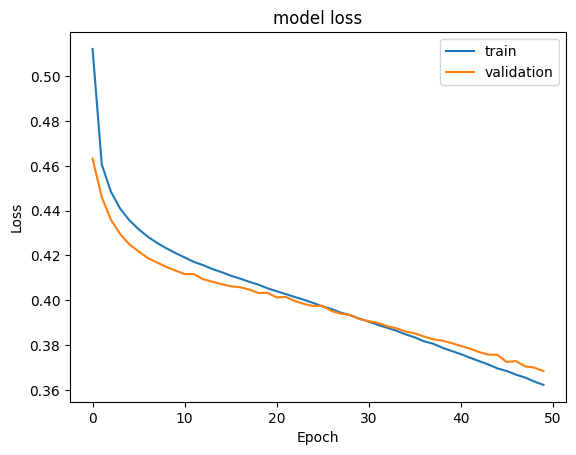

38/38 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8475


In [1278]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model.evaluate(X_test, y_test)

In [1279]:
# Predicting y using default threshold.
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)
y_pred

57/57 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

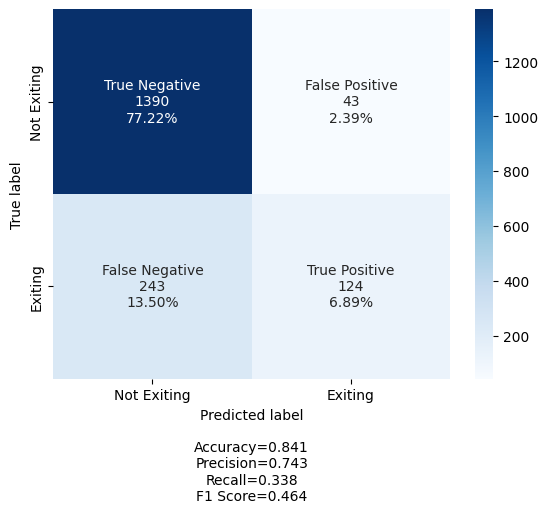

In [1280]:
# Calculating the confusion matrix.
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_val, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1281]:
# Accuracy as per the classification report.
cr = sklearn.metrics.classification_report(y_val,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1433
           1       0.74      0.34      0.46       367

    accuracy                           0.84      1800
   macro avg       0.80      0.65      0.69      1800
weighted avg       0.83      0.84      0.82      1800



* This model using SGD is not very good.
* The recall is only 0.34.
* Results are 13.5% of customers exiting without the bank attempting to intervene.

### Model Building: Neural Network model with Adam Optimizer

In [1282]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [1283]:
# Creating a sequential model.
model1 = Sequential()
# Adding the hidden and output layers.
model1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [1284]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer1 = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['accuracy'])

In [1285]:
# Checking the summary of the model.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1286]:
# Fitting the model to training data and storing the results.
history1 = model1.fit(X_train,
                      y_train,
                      batch_size=64,
                      epochs=50,
                      verbose=1,
                      validation_data=(X_val, y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
110/110 [==============================] - 2s 5ms/step - loss: 0.4792 - accuracy: 0.7866 - val_loss: 0.4247 - val_accuracy: 0.8078
Epoch 2/50
110/110 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8124 - val_loss: 0.4092 - val_accuracy: 0.8222
Epoch 3/50
110/110 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8269 - val_loss: 0.4017 - val_accuracy: 0.8261
Epoch 4/50
110/110 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.8341 - val_loss: 0.3922 - val_accuracy: 0.8361
Epoch 5/50
110/110 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8379 - val_loss: 0.3858 - val_accuracy: 0.8372
Epoch 6/50
110/110 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8413 - val_loss: 0.3791 - val_accuracy: 0.8422
Epoch 7/50
110/110 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8461 - val_loss: 0.3699 - val_accuracy: 0.8489
Epoch 

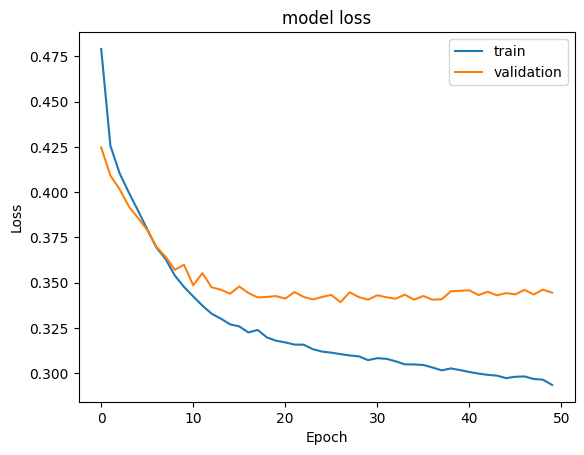

38/38 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8600


In [1287]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model1.evaluate(X_test, y_test)

219/219 [==============================] - 0s 2ms/step
Best Threshold=0.211177, G-Mean=0.822


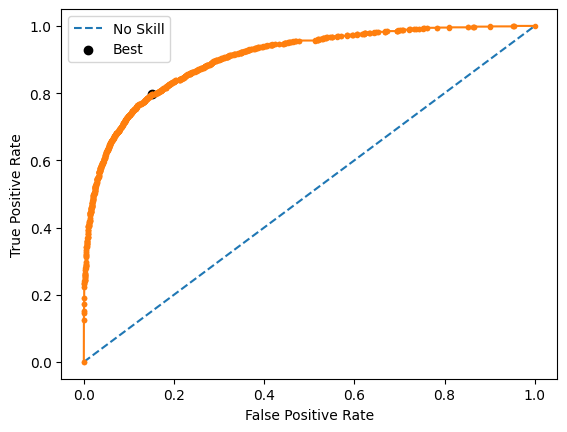

In [1288]:
# Predicting probabilities.
yhat1 = model1.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat1 = yhat1[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds1 = roc_curve(y_train, yhat1)
# Calculating the g-mean for each threshold.
gmeans1 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [1289]:
# Predicting the results using best as a threshold.
y_pred1 = model1.predict(X_val)
y_pred1 = (y_pred1 > thresholds1[ix])
y_pred1

57/57 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

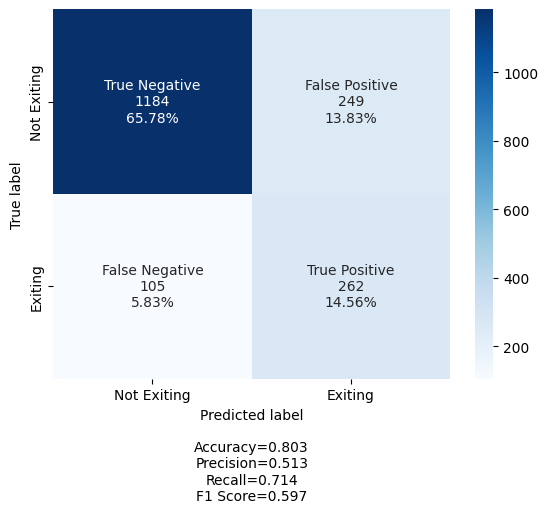

In [1290]:
# Calculating the confusion matrix.
cm1 = confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1291]:
# Accuracy as per the classification report.
cr1 = sklearn.metrics.classification_report(y_val,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1433
           1       0.51      0.71      0.60       367

    accuracy                           0.80      1800
   macro avg       0.72      0.77      0.73      1800
weighted avg       0.84      0.80      0.81      1800



* This model is much better than the first model.
* Recall score has bumped up to 0.71 using the Adam optimizer.
* Results in 5.83% of customers exiting without the bank attempting to intervene.
  * Half of the previous model.

### Model Improvement: Neural Network model with Dropout

In [1292]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [1293]:
# Creating a sequential model.
model2 = Sequential()
# Adding the hidden and output layers with drop out.
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [1294]:
# Checking the summary of the model.
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (

In [1295]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer2 = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer2,metrics=['accuracy'])

In [1296]:
# Fitting the model to training data and storing the results.
history2 = model2.fit(X_train,
                      y_train,
                      batch_size=64,
                      epochs=100,
                      verbose=1,
                      validation_data=(X_val, y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/100
110/110 [==============================] - 2s 6ms/step - loss: 0.4630 - accuracy: 0.7897 - val_loss: 0.4177 - val_accuracy: 0.8189
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.8123 - val_loss: 0.4058 - val_accuracy: 0.8211
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8256 - val_loss: 0.3957 - val_accuracy: 0.8350
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 0.4026 - accuracy: 0.8324 - val_loss: 0.3840 - val_accuracy: 0.8411
Epoch 5/100
110/110 [==============================] - 1s 5ms/step - loss: 0.3944 - accuracy: 0.8366 - val_loss: 0.3750 - val_accuracy: 0.8461
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.3826 - accuracy: 0.8407 - val_loss: 0.3635 - val_accuracy: 0.8511
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.3726 - accuracy: 0.8447 - val_loss: 0.3543 - val_accuracy: 0.8594

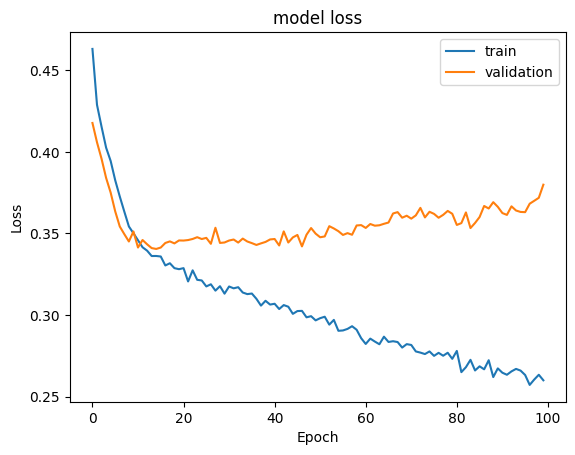

38/38 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8567


In [1297]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model2.evaluate(X_test, y_test)

219/219 [==============================] - 0s 2ms/step
Best Threshold=0.194636, G-Mean=0.880


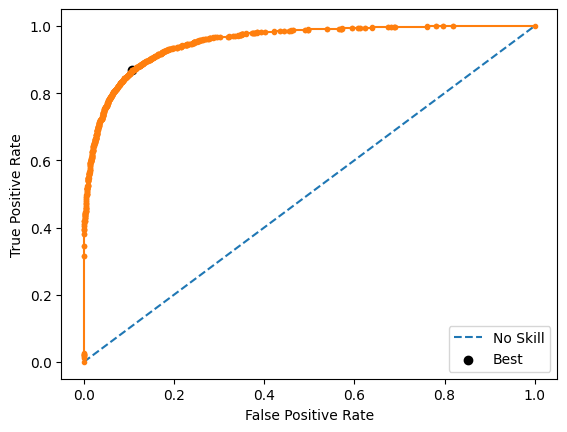

In [1298]:
# Predicting probabilities.
yhat2 = model2.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat2 = yhat2[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds2 = roc_curve(y_train, yhat2)
# Calculating the g-mean for each threshold.
gmeans2 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [1299]:
# Predicting the results using best as a threshold.
y_pred2 = model2.predict(X_val)
y_pred2 = (y_pred2 > thresholds2[ix])
y_pred2

57/57 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

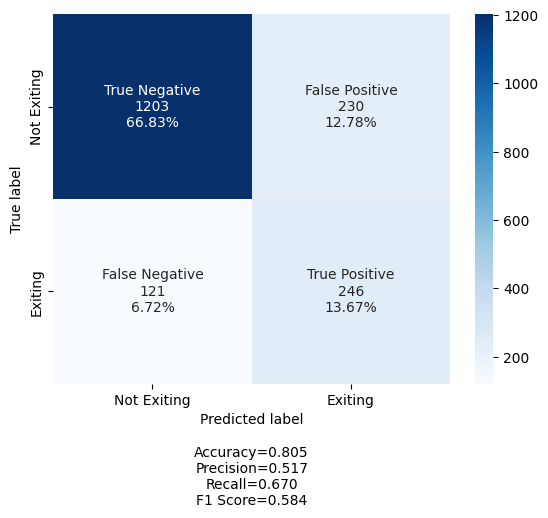

In [1300]:
# Calculating the confusion matrix.
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_val, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1301]:
# Accuracy as per the classification report.
cr2 = sklearn.metrics.classification_report(y_val,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1433
           1       0.52      0.67      0.58       367

    accuracy                           0.81      1800
   macro avg       0.71      0.75      0.73      1800
weighted avg       0.83      0.81      0.81      1800



* This model performs similarly to the previous model.
* Recall score has dropped slightly very slightly.
* Results in 6.72% of customers exiting without the bank attempting to intervene.

### Model Improvement: Neural Network model with Hyperparameter tuning using GridSearchCV

In [1302]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [1303]:
# Defining function to create and compile ANN.
def create_model(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32,batch_size=40):
    np.random.seed(1337)
    #Initializing the neural network
    model3 = Sequential()
    # This adds the input layer (by specifying input dimension).
    model3.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    # Adding dropout.
    model3.add(Dropout(0.5))
    # Adding the hidden layer.
    model3.add(Dense(layer_2,activation='relu'))
    # Adding the output layer.
    model3.add(Dense(1, activation='sigmoid'))
    # Adding Adam initializer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # Compiling with Adam optimizer and binary cross entropy loss function.
    model3.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model3

In [1304]:
# Creating estimator using KerasClassifier with inital lr of 0.001 and build_fn create_model.
keras_estimator = KerasClassifier(lr= 0.001, build_fn=create_model, verbose=1)

In [1305]:
# Defining the grid search parameters.
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}
# Using 3 folds for validation.
kfold_splits = 3
# Using GridSearchCV to find best parameters for ANN.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    n_jobs=-1)

In [1306]:
# Using the best parameters found from grid search and fitting the model on training data and using X_val and y_val as validation data.
grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val), verbose=1)
# Summarize results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean.
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation.
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters.
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
175/175 [==============================] - 2s 4ms/step - loss: 0.4492 - accuracy: 0.8040 - val_loss: 0.4099 - val_accuracy: 0.8267
Best: 0.814429 using {'batch_size': 40, 'lr': 0.01}


In [1307]:
# Creating the model.
estimator = create_model(lr=grid_result.best_params_['lr'], batch_size=grid_result.best_params_['batch_size'])
# Printing model summary.
estimator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1308]:
# Fitting the model to training data and storing the results.
history3 = estimator.fit(X_train,
                         y_train,
                         epochs=100,
                         batch_size =
                         grid_result.best_params_['batch_size'],
                         verbose=1,
                         validation_data=(X_val,y_val))
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/100
175/175 [==============================] - 2s 5ms/step - loss: 0.4584 - accuracy: 0.8043 - val_loss: 0.4062 - val_accuracy: 0.8189
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.8186 - val_loss: 0.4013 - val_accuracy: 0.8300
Epoch 3/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8267 - val_loss: 0.3896 - val_accuracy: 0.8367
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8267 - val_loss: 0.3821 - val_accuracy: 0.8472
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4027 - accuracy: 0.8357 - val_loss: 0.3753 - val_accuracy: 0.8483
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 0.3908 - accuracy: 0.8383 - val_loss: 0.3569 - val_accuracy: 0.8544
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 0.3785 - accuracy: 0.8440 - val_loss: 0.3602 - val_accuracy: 0.8611

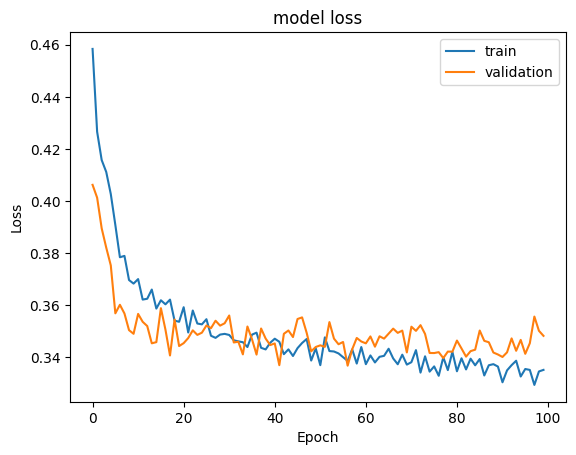

38/38 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8500


In [1309]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = estimator.evaluate(X_test, y_test)

219/219 [==============================] - 1s 2ms/step
Best Threshold=0.182943, G-Mean=0.805


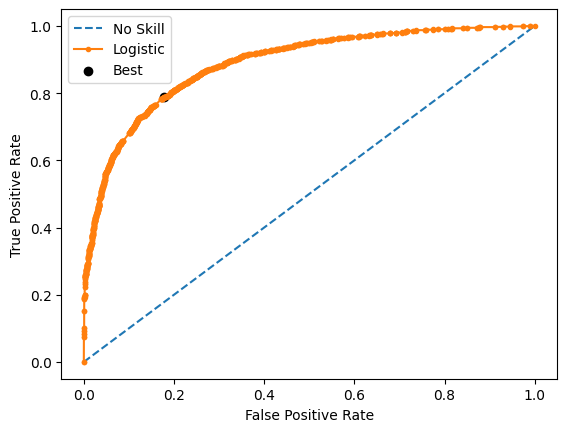

In [1310]:
# Predicting probabilities.
yhat3 = estimator.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat3 = yhat3[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds3 = roc_curve(y_train, yhat3)
# Calculating the g-mean for each threshold.
gmeans3 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [1311]:
# Predicting the results using best as a threshold.
y_pred3 = estimator.predict(X_val)
y_pred3 = (y_pred3 > thresholds3[ix])
print(y_pred3)

57/57 [==============================] - 0s 3ms/step
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]


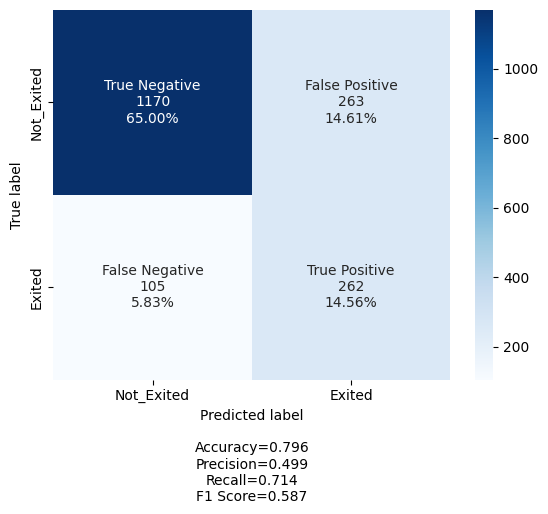

In [1312]:
# Calculating the confusion matrix.
cm3 = confusion_matrix(y_val, y_pred3)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1313]:
# Accuracy as per the classification report.
cr3 = sklearn.metrics.classification_report(y_val,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1433
           1       0.50      0.71      0.59       367

    accuracy                           0.80      1800
   macro avg       0.71      0.77      0.73      1800
weighted avg       0.83      0.80      0.81      1800



* This model using Adam optimizer with Hyperparameter tuning has performed the best so far.
* Recall is now up to 0.71.
* Results in only 5.83% of customers leaving without the bank attempting to intervene.

### Model Improvement: Neural Network model with balanced data

In [1314]:
# Applying SMOTE on training data to oversample data.
sm = SMOTE(sampling_strategy='not majority')
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)
print('After resampling, the shape of X_train: {}'.format(X_train.shape))
print('After resampling, the shape of y_train: {} \n'.format(y_train.shape))

After resampling, the shape of X_train: (7000, 11)
After resampling, the shape of y_train: (7000, 1) 



In [1315]:
# Checking value counts of y_train before oversampling.
y_train.value_counts()

Exited
0         5574
1         1426
dtype: int64

In [1316]:
# Checking value counts of y_train_sm after oversampling.
y_train_sm.value_counts()

Exited
0         5574
1         5574
dtype: int64

In [1317]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime.
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [1318]:
# Creating a sequential model.
model4 = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding the dropout.
model4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons.
model4.add(Dense(16,activation='relu'))
# Adding the dropout.
model4.add(Dropout(0.1))
# Adding hidden layer with 8 neurons.
model4.add(Dense(8, activation='relu'))
# Adding the output layer.
model4.add(Dense(1, activation = 'relu'))

In [1319]:
# Printing model summary.
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [1320]:
# Defining EarlyStopping as the callback for this model.
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer.
optimizer4 = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics.
model4.compile(optimizer=optimizer4,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model to training data and storing the results.
history4 = model4.fit(X_train_sm,
                      y_train_sm,
                      batch_size=64,
                      epochs=100,
                      verbose=1,
                      validation_data = (X_val,y_val),
                      callbacks=[es_cb])

Epoch 1/100
175/175 [==============================] - 3s 5ms/step - loss: 1.1009 - accuracy: 0.5236 - val_loss: 0.5445 - val_accuracy: 0.7800
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.7301 - accuracy: 0.6206 - val_loss: 0.5210 - val_accuracy: 0.7933
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.6471 - val_loss: 0.5094 - val_accuracy: 0.7783
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6274 - accuracy: 0.6615 - val_loss: 0.5274 - val_accuracy: 0.7778
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6197 - accuracy: 0.6904 - val_loss: 0.5229 - val_accuracy: 0.7639
Epoch 6/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5945 - accuracy: 0.7006 - val_loss: 0.5327 - val_accuracy: 0.7572
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5819 - accuracy: 0.7125 - val_loss: 0.5144 - val_accuracy: 0.7783

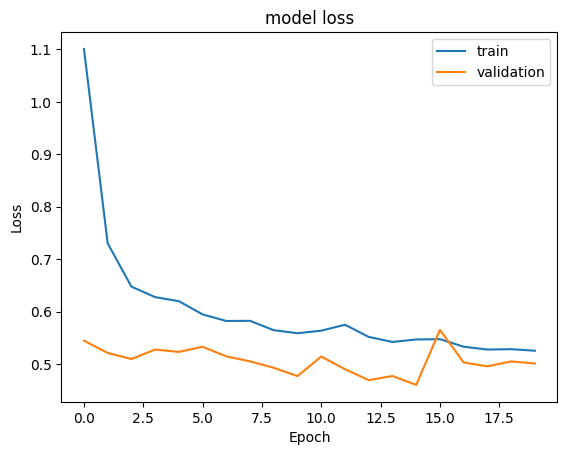

38/38 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7508


In [1321]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Printing results.
results = model4.evaluate(X_test, y_test)

219/219 [==============================] - 0s 2ms/step
Best Threshold=0.503732, G-Mean=0.752


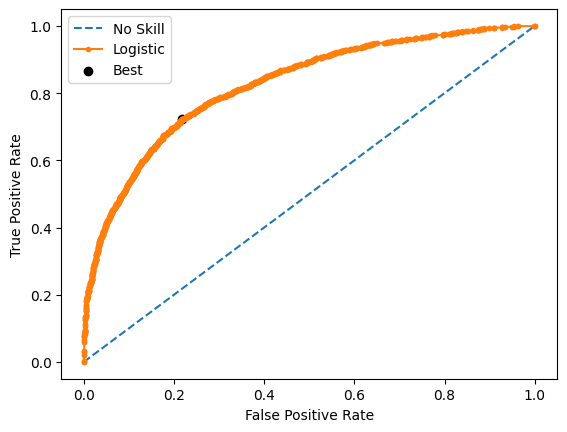

In [1322]:
# Predicting probabilities.
yhat4 = model4.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat4 = yhat4[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds4 = roc_curve(y_train, yhat4)
# Calculating the g-mean for each threshold.
gmeans4 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [1323]:
# Predicting the results using best as a threshold.
y_pred4 = model4.predict(X_val)
y_pred4 = (y_pred4 >thresholds4[ix])
y_pred4

57/57 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

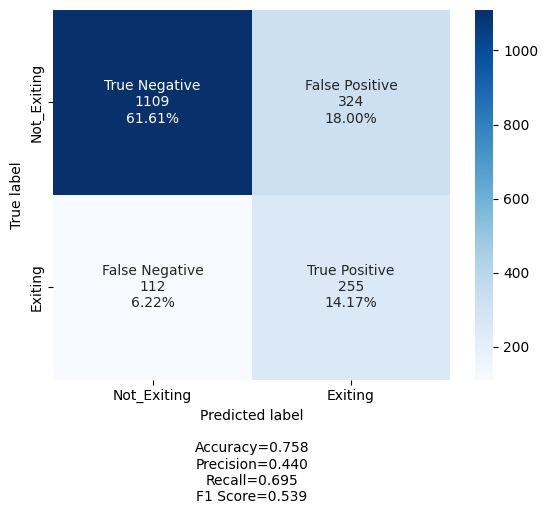

In [1324]:
# Calculating the confusion matrix.
cm4 = confusion_matrix(y_val, y_pred4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exiting','Exiting']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1325]:
# Accuracy as per the classification report.
cr4 = sklearn.metrics.classification_report(y_val,y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1433
           1       0.44      0.69      0.54       367

    accuracy                           0.76      1800
   macro avg       0.67      0.73      0.69      1800
weighted avg       0.81      0.76      0.78      1800



* This model performs slightly worse than the last model.
* Recall is down to 0.69.
* Results in 5.83% of customers leaving without the bank attempting to intervene.

## Final Model

* The ANN with Adam optimizer using GridSearchCV to tube Hyperparameters was chosen as final model.
* This model was chose because it yielded the highest recall score.
* As previously noted before model building, a high recall score is best for the banks needs.

In [1326]:
# Creating variable model_final to be used as the final model.
model_final = estimator

219/219 [==============================] - 0s 2ms/step
Best Threshold=0.182943, G-Mean=0.805


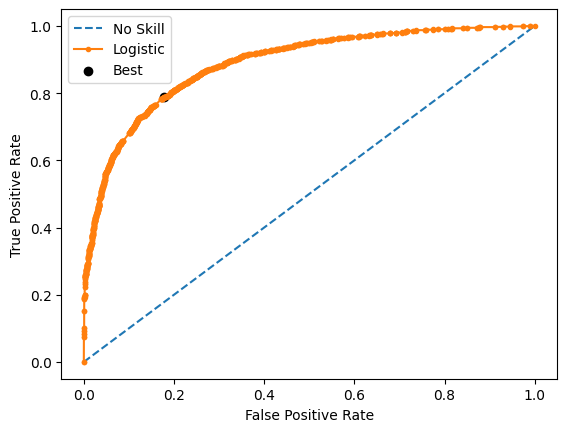

In [1327]:
# Predicting probabilities using the final model.
yhat_f = model_final.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat_f = yhat_f[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds_f = roc_curve(y_train, yhat_f)
# Calculating the g-mean for each threshold.
gmeans_f = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans_f)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_f[ix], gmeans_f[ix]))
# Plotting the roc curve for the final model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [1328]:
# Predicting the results on test data using best as a threshold.
y_pred_test = model_final.predict(X_test)
y_pred_test = (y_pred_test > thresholds_f[ix])
print(y_pred_test)

38/38 [==============================] - 0s 2ms/step
[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


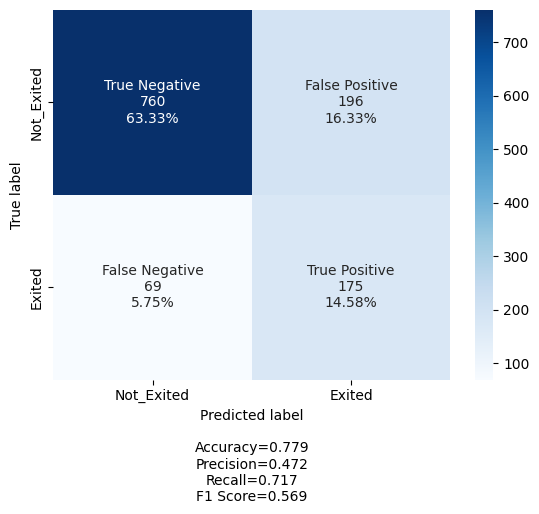

In [1329]:
# Calculating the confusion matrix.
cm_f = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_f,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [1330]:
# Accuracy as per the classification report.
cr_final = sklearn.metrics.classification_report(y_test, y_pred_test)
print(cr_final)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       956
           1       0.47      0.72      0.57       244

    accuracy                           0.78      1200
   macro avg       0.69      0.76      0.71      1200
weighted avg       0.83      0.78      0.79      1200



## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* Try to find out why customer's are churning at such a high rate in Germany.
* Use this final model on customer data to identify customers who will exit.
  * Offer some type of incentive to these customers in attempts to retain their business.
* Further investigate why customers who purchased more than 2 products have such a high churn rate.

___